** I used Claude quite extensively on this assignment for explanations and some computations, and the plotting function, as well as the second problem in most of its entirety after seeking help from a classmate. Despite reading both of the associated chapters of the textbook, I felt very uncertain about these concepts, and I plan on coming in to discuss.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

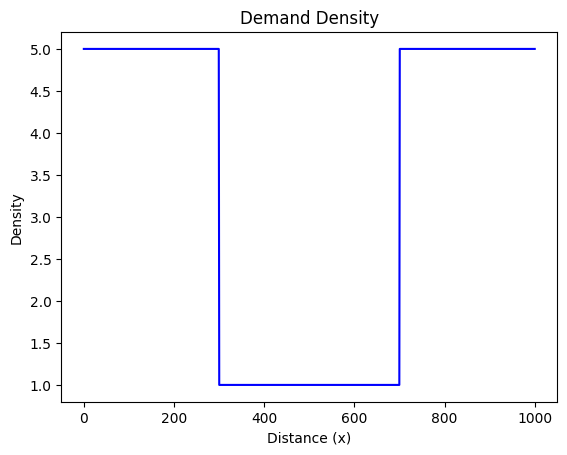

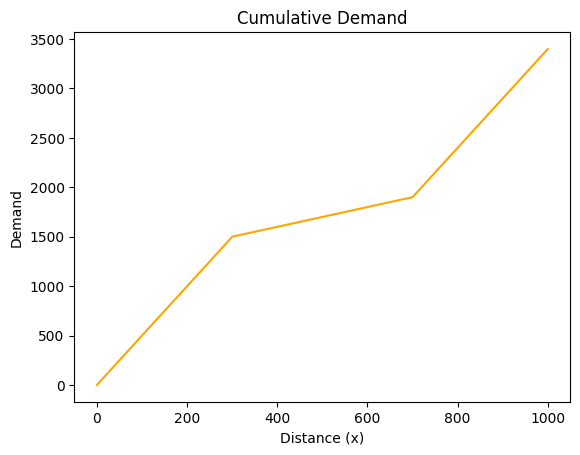

In [21]:
def demand_density(d): # w(x) or D'(x)
    if d <= 300:
        return 5
    elif d < 700:
        return 1
    else:
        return 5
    
def cumulative_demand(d): # D(x)
    if d <= 300:
        return 5 * d
    elif d < 700:
        return 5 * 300 + 1 * (d - 300)
    else:
        return 5 * 300 + 1 * (700 - 300) + 5 * (d - 700)

x = np.linspace(0, 1000, 1000)
y = [demand_density(d) for d in x]
plt.plot(x, y, label='Demand Density', color='blue')
plt.xlabel('Distance (x)')
plt.ylabel('Density')
plt.title('Demand Density')
plt.show()


x = np.linspace(0, 1000, 1000)
y = [cumulative_demand(d) for d in x]
plt.plot(x, y, label='Cumulative Demand', color='orange')
plt.xlabel('Distance (x)')
plt.ylabel('Demand')
plt.title('Cumulative Demand')
plt.show()

### a)
For 1 terminal we look for the point where $D(x) = D(1000)/2 \rightarrow x = 500$. We can verify this by seeing that $\int_0^{500} w(x) dx = \int_{500}^{1000} w(x) = 1700 = D(500)$. The access cost is calculated by evaluating $\int_0^{1000} |x-500| \cdot w(x) dx$, which we can divide into parts: $\int_0^{500} (500-x) w(x) dx + \int_{500}^{1000} (x-500) w(x) dx$. Since $w(x)$ changes at $300$ and $700$, we divide further: $\int_0^{300} (500-x) \cdot 5 dx + \int_{300}^{500} (500-x) \cdot 1 dx + \int_{500}^{700} (x-500) \cdot 1 dx + \int_{700}^{1000} (x-500) \cdot 5 dx = 525,000 + 20,000 + 20,000 + 525,000 = \textbf{1,090,000 \text{Mu/Tu}}$ with terminal at distance $\textbf{500}$. \
\
\
For 2 terminals we divide the space into two equal regions, which the 1 terminal problem already did for us. So our two regions are $[0, 500]$, and $[500, 1000]$. Again, since our demand density is symmetric, we can just calculate for $[0, 500]$ and reflect to the other region. We now look for the point where $D(x) = D(500)/2 \rightarrow x_1 = 170$. We can verify this by seeing that $\int_0^{170} w(x) dx = \int_{170}^{500} w(x) = 850 = D(170)$. We also reflect the other terminal to $1000-170=830=x_2$. The access cost is $2 \left( \int_0^{170} (170-x) \cdot 5 dx + \int_{170}^{300} (x-170) \cdot 5 dx + \int_{300}^{500} (x-170) \cdot 1 dx \right) = 2 (72,250 + 42,250 + 46,000) = \textbf{321,000 \text{Mu/Tu}}$ with terminals at distances $\textbf{170}$ and $\textbf{830}$.
\
\
For 3 terminals, we look for where $x = D(1000)/3 \rightarrow x \approx 226$. So our regions are $[0, 226], [226, 774], [774, 1000]$. Since all of our regions have a symmetric $w(x)$, we can simply place the terminals in the center of each one. So our terminal locations are $x_1 = 113, x_2 = 500, x_3 = 887$. The access cost is $2 \left( \int_0^{113} (113-x) \cdot 5 dx + \int_{113}^{226} (x-113) \cdot 5 dx \right) + \int_{226}^{300} (500-x) \cdot 5 dx + \int_{300}^{500} (500-x) \cdot 1 dx + \int_{500}^{700} (x-500) \cdot 1 dx + \int_{700}^{774} (x-500) \cdot 5 dx = 2(31,922.5 + 31,922.5) + 87,690, + 20,000 + 20,000 + 87,690 = \textbf{343,070 \text{Mu/Tu}}$ with terminals at distances $\textbf{113}$, $\textbf{500}$, and $\textbf{887}$.

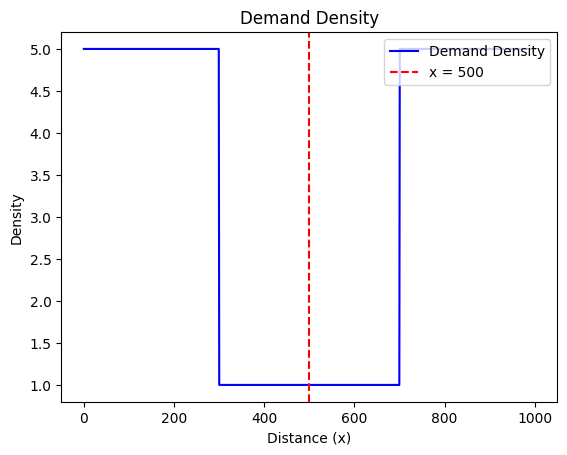

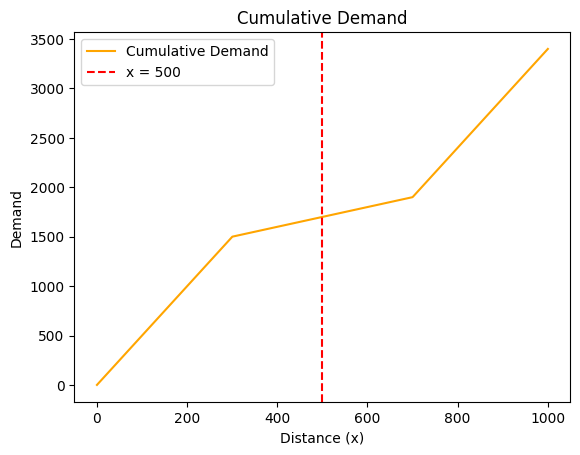

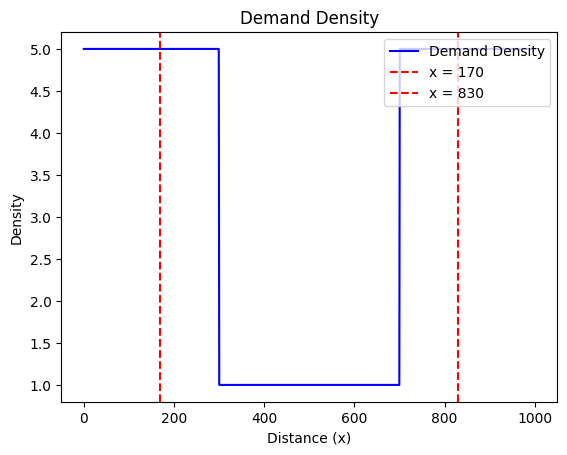

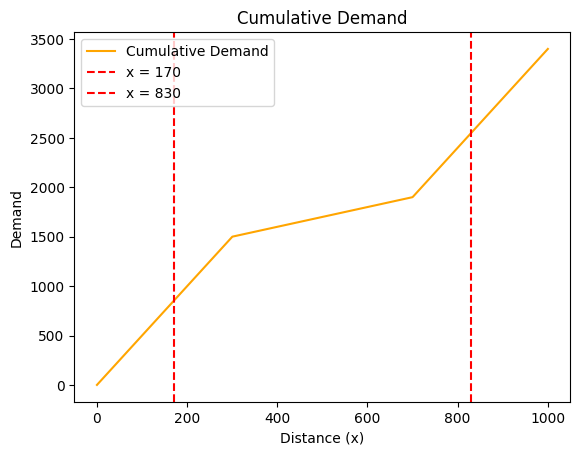

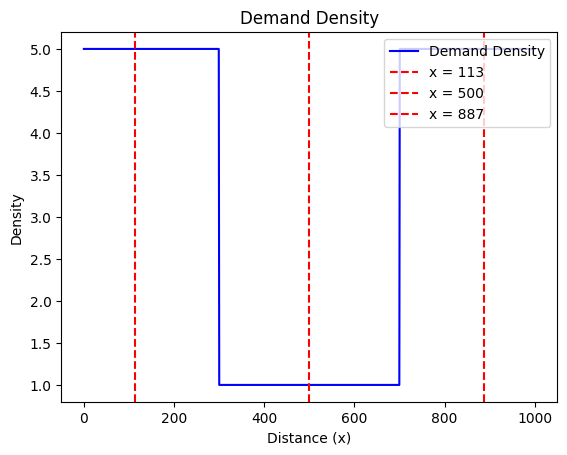

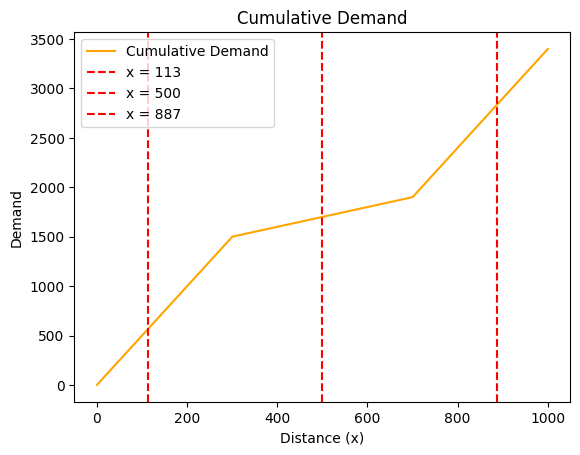

In [48]:
# Function to plot demand density and cumulative demand
def plot_demand(locations, x_range=(0, 1000)):
    """
    Plots the demand density and cumulative demand with vertical lines at specified locations.

    Parameters:
    - locations: List of x-coordinates where vertical lines should be drawn.
    - x_range: Tuple specifying the range of x values (default is (0, 1000)).
    """
    x = np.linspace(x_range[0], x_range[1], 1000)

    # Plot Demand Density
    y_density = [demand_density(d) for d in x]
    plt.plot(x, y_density, label='Demand Density', color='blue')
    for loc in locations:
        plt.axvline(x=loc, color='red', linestyle='--', label=f'x = {loc}')
    plt.xlabel('Distance (x)')
    plt.ylabel('Density')
    plt.title('Demand Density')
    plt.legend(loc='upper right')
    plt.show()

    # Plot Cumulative Demand
    y_cumulative = [cumulative_demand(d) for d in x]
    plt.plot(x, y_cumulative, label='Cumulative Demand', color='orange')
    for loc in locations:
        plt.axvline(x=loc, color='red', linestyle='--', label=f'x = {loc}')
    plt.xlabel('Distance (x)')
    plt.ylabel('Demand')
    plt.title('Cumulative Demand')
    plt.legend(loc='upper left')
    plt.show()

# Example usage
stations_1 = [500]
stations_2 = [170, 830]
stations_3 = [113, 500, 887]

# Plot for different sets of stations
plot_demand(stations_1)
plot_demand(stations_2)
plot_demand(stations_3)

### b)
We wish to locate terminals as close to the coordinates we listed above. For 1 terminal, $\textbf{475}$ is the closest, and the access cost is $\textbf{1,090,625 \text{Mu/Tu}}$ (calculated like above), a 0.05% increase. \
For 2 terminals, the best are $\textbf{159}$ and $\textbf{835}$. This has an access cost of $\textbf{321,730 \text{Mu/Tu}}$, a 0.22% increase. \
For 3 terminals, the best are $\textbf{129}$, $\textbf{475}$, and $\textbf{866}$, with an access cost of $\textbf{347,180 \text{Mu/Tu}}$, a 1.1% increase.

In [45]:
from sympy import symbols, integrate

def compute_integral(a, b, c):
    x = symbols('x')

    integral_value = (
        integrate((a - x) * 5, (x, 0, a)) +
        integrate((x - a) * 5, (x, a, 226)) +
        integrate((b - x) * 5, (x, 226, 300)) +
        integrate((b - x) * 1, (x, 300, b)) +
        integrate((x - b) * 1, (x, b, 700)) +
        integrate((x - b) * 5, (x, 700, 774)) +
        integrate((c - x) * 5, (x, 774, c)) +
        integrate((x - c) * 5, (x, c, 1000))
    )

    return integral_value

result = compute_integral(129, 475, 866)
print(f"The value of the integral is: {result}")

The value of the integral is: 347180


# Problem 2

We want enough ($N$) vehicles such that $N$ is greater than or equal to the largest likely value of shipment requests during the vehicle's trip. For $D$ items per time and $v$ items in a shipment, we need $D'/v$ shipments per time. And given an average vehicle trip time of $t_r$, that gives us $\frac{D't_r}{v}$. But there is also two terms of randomness, one for the trip time, and one for the arrivals. The one for trip time has a variance with respect to the cycle standard deviation, $\sigma_r^2$, $\left( \frac{D'\sigma_r}{v} \right)^2$. And for the arrivals, the variance is \frac{1}{v} times the mean $\frac{D't_r}{v}$ times a coefficient $\gamma$, giving $\frac{D'\gamma t_r}{v^2}$, though this term is often negligible. Since the variances are independent, we can add them and the total standard deviation is $\sqrt{\left(\frac{D'\sigma_r}{v} \right)^2 + \frac{D'\gamma t_r}{v^2}}$ To be safe, we multiply this SD by a factor of 3 (as the problem desires), which will cover (99.7%). Then adding, we are left with the same form as the expression: $$N \approx \frac{Dt_r}{v} + 3 \sqrt{\left( \frac{D'\sigma_r}{v} \right)^2 + \frac{D'\gamma t_r}{v^2}}$$